### Import Dependancies 

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# Import Data 
production = "Production.csv"

# Read data into Pandas DataFrames
production_df = pd.read_csv(production)
production_df.head()


,Date,Product,DirectMaterial,DirectLabour,VariableOverhead,FixedOverhead,ProductionVolume
0,Jan-10,Accessories & Equipment,1.6,2.85,1.3,25000.0,35995.0
1,Feb-10,Accessories & Equipment,1.6,2.28,1.3,25000.0,34720.0
2,Mar-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,20792.0
3,Apr-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,21329.0
4,May-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,19028.0


### Clean Data

In [3]:
# Drop Null Values 
production_df = production_df.dropna()

In [4]:
# Round Volume to nearest 100
production_df['ProductionVolume'] = (production_df['ProductionVolume'] / 100).round() * 100
production_df.head()

,Date,Product,DirectMaterial,DirectLabour,VariableOverhead,FixedOverhead,ProductionVolume
0,Jan-10,Accessories & Equipment,1.6,2.85,1.3,25000.0,36000.0
1,Feb-10,Accessories & Equipment,1.6,2.28,1.3,25000.0,34700.0
2,Mar-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,20800.0
3,Apr-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,21300.0
4,May-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,19000.0


In [5]:
# Calculate Total Production cost

production_df['TotalCost'] = ((production_df['DirectMaterial'] + 
                               production_df['DirectLabour'] + 
                               production_df['VariableOverhead']) * 
                               production_df['ProductionVolume']) + production_df['FixedOverhead']
production_df.head()

,Date,Product,DirectMaterial,DirectLabour,VariableOverhead,FixedOverhead,ProductionVolume,TotalCost
0,Jan-10,Accessories & Equipment,1.6,2.85,1.3,25000.0,36000.0,232000.0
1,Feb-10,Accessories & Equipment,1.6,2.28,1.3,25000.0,34700.0,204746.0
2,Mar-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,20800.0,124840.0
3,Apr-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,21300.0,127240.0
4,May-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,19000.0,116200.0


In [6]:
#Calculate Cost per unit

production_df['CostPerUnit'] = (production_df['TotalCost'] / production_df['ProductionVolume']).round(2)

production_df.head()

,Date,Product,DirectMaterial,DirectLabour,VariableOverhead,FixedOverhead,ProductionVolume,TotalCost,CostPerUnit
0,Jan-10,Accessories & Equipment,1.6,2.85,1.3,25000.0,36000.0,232000.0,6.44
1,Feb-10,Accessories & Equipment,1.6,2.28,1.3,25000.0,34700.0,204746.0,5.90
2,Mar-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,20800.0,124840.0,6.00
3,Apr-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,21300.0,127240.0,5.97
4,May-10,Accessories & Equipment,1.6,1.90,1.3,25000.0,19000.0,116200.0,6.12


In [9]:
production_df.to_csv('../Cleaned_Data/Production.csv', index=False)

### Clustering Based on Cost Per Unit

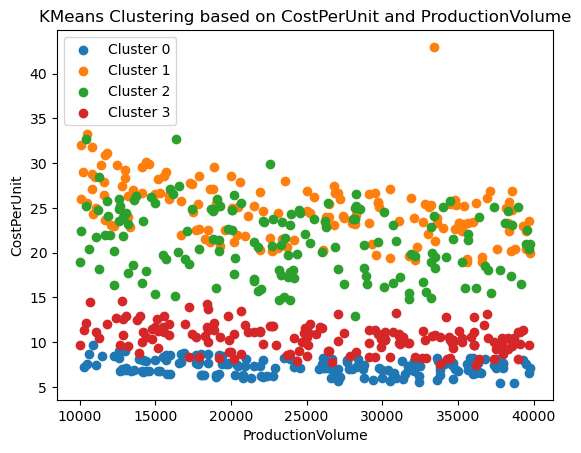

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Sample DataFrame
# df = pd.DataFrame(...)  # this is just a placeholder, you already have production_df

# One-hot encoding the 'Product' column
product_encoded = pd.get_dummies(production_df['Product'], prefix='Product')

# Extract necessary columns and concatenate the encoded product data
X = pd.concat([production_df[['ProductionVolume', 'CostPerUnit']], product_encoded], axis=1)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (for this example, let's use 3)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
production_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plotting the clusters for visualization
for cluster_num in range(n_clusters):
    cluster_data = production_df[production_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['ProductionVolume'], cluster_data['CostPerUnit'], label=f'Cluster {cluster_num}')

plt.xlabel('ProductionVolume')
plt.ylabel('CostPerUnit')
plt.title('KMeans Clustering based on CostPerUnit and ProductionVolume')
plt.legend()
plt.show()


In [22]:
print(production_df[['Product', 'Cluster']])

                     Product  Cluster
0    Accessories & Equipment        0
1    Accessories & Equipment        0
2    Accessories & Equipment        0
3    Accessories & Equipment        0
4    Accessories & Equipment        0
..                       ...      ...
652                 Footwear        2
653                 Footwear        2
654                 Footwear        2
655                 Footwear        2
656                 Footwear        2

[640 rows x 2 columns]


In [23]:
clustered_products_df = production_df[['Product', 'Cluster']]
clustered_products_df

,Product,Cluster
0,Accessories & Equipment,0
1,Accessories & Equipment,0
2,Accessories & Equipment,0
3,Accessories & Equipment,0
4,Accessories & Equipment,0
...,...,...
652,Footwear,2
653,Footwear,2
654,Footwear,2
655,Footwear,2


In [24]:
clustered_products_df.to_csv('../Cleaned_Data/Clusters.csv', index=False)